# **Predictive Maintenance System for Automotive Vehicles**

Group 8:

ALFONSO, Francis Donald (THU)

DOLOJAN, Julian (THX)

PILAPIL, Marcus Corso (THX)

You may access the web app in our Github repository: https://github.com/fpalfonso/CS-180-Project.git

Link to the presentation slides: https://www.canva.com/design/DAGGoOGz3Ro/g1I5f7B48EXE4E8vfRsjnA/view?utm_content=DAGGoOGz3Ro&utm_campaign=designshare&utm_medium=link&utm_source=editor

## **About the Dataset**

### **Source:** https://www.kaggle.com/datasets/navins7/vehicle-maintenance-record/data?select=Vehicle+Maintenance-+Service+Records.csv

### The dataset contains information about vehicles, including their characteristics, maintenance history, and associated costs. It's a mix of categorical and numerical data, with binary indicators for maintenance tasks.

### **Features**:
- **Identification and Vehicle Information**:
  - **slno**: Serial number, a unique identifier for each row/entry.
  - **vehicle_type**: Categorical feature indicating the type of vehicle (e.g., car).
  - **brand**: Categorical feature denoting the brand of the vehicle (e.g., Honda).
  - **model**: Categorical feature specifying the model of the vehicle (e.g., Jazz).
  - **engine_type**: Categorical feature indicating the type of engine (e.g., petrol).
  - **make_year**: Numerical feature representing the manufacturing year of the vehicle.
  - **region**: Categorical feature indicating the region where the vehicle is located.
- **Maintenance Information**:
  - **mileage_range**: Numerical feature representing the range of mileage.
  - **mileage**: Numerical feature denoting the mileage of the vehicle.
  - **oil_filter, engine_oil, washer_plug_drain, dust_and_pollen_filter, whell_alignment_and_balancing, air_clean_filter, fuel_filter, spark_plug, brake_fluid, brake_and_clutch_oil, transmission_fluid, brake_pads, clutch, coolant**: Binary features indicating whether various maintenance tasks have been performed (1 for yes, 0 for no).
- **Cost Information**:
  - **cost**: Numerical feature representing the cost associated with the vehicle maintenance.

### Overall, this dataset provides valuable insights into the maintenance history of vehicles, allowing for analysis of maintenance patterns, costs, and potential correlations between maintenance tasks and vehicle characteristics.

## **Dataset and Module Imports**

### This section describes the steps taken to import the dataset and prepare it for further processing. We start by importing the necessary libraries and then load the dataset from a remote source, making a clone for non-destructive manipulation.

1. **Import Necessary Libraries**:
   - This block imports all the required libraries for data manipulation, model training, and evaluation.
   - We use `pandas` for data manipulation, `numpy` for numerical operations, and `matplotlib` and `seaborn` for data visualization.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. **Load the Dataset**:
   - We import the Service Records dataset from a GitHub repository and store it in a dataframe named `dataset`.
   - The dataset is cloned into `service_records` to allow non-destructive manipulation. This means we can perform operations on `service_records` without altering the original `dataset`, ensuring data integrity and making it easier to backtrack if needed.

In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/fpalfonso/CS-180-Project/main/Dataset/Vehicle%20Maintenance-%20Service%20Records.csv"

# The dataset is loaded into a pandas DataFrame.
dataset = pd.read_csv(url)

# Create a copy of the dataset
service_records = dataset.copy()

# Check/Verify the dimension of the data
service_records.shape

(1139, 24)

### Summary
By following these initial steps, we ensure that our environment is set up with all necessary libraries, and our data is loaded and ready for preprocessing. Importing and cloning the dataset helps maintain data integrity and facilitates safe, non-destructive data manipulation. This approach is crucial for a smooth and efficient data processing workflow.

## **Data Preprocessing**

### In this section, we detail the steps taken to preprocess the dataset for our machine learning project, ensuring the data is clean, relevant, and in a suitable format for the Naive Bayes algorithm used in our model.

1. **Removing Unnecessary Columns**:
   - The original dataset contains several columns that are not required for our analysis and model training. These columns include `slno`, `vehicle_type`, `region`, `make_year`, and `cost`.
   - We drop these columns to simplify the dataset and focus on the features that are relevant for predicting service needs.

In [3]:
# Check/Verify column names
service_records.columns

Index(['slno', 'vehicle_type', 'brand', 'model', 'engine_type', 'make_year',
       'region', 'mileage_range', 'mileage', 'oil_filter', 'engine_oil',
       'washer_plug_drain', 'dust_and_pollen_filter',
       'whell_alignment_and_balancing', 'air_clean_filter', 'fuel_filter',
       'spark_plug', 'brake_fluid', 'brake_and_clutch_oil',
       'transmission_fluid', 'brake_pads', 'clutch', 'coolant', 'cost'],
      dtype='object')

In [4]:
# Remove columns that will not be used
service_records = service_records.drop(columns=['slno', 'vehicle_type', 'region', 'make_year', 'cost'])

# Verify if columns were removed by checking shape
service_records.shape

(1139, 19)

In [5]:
# Analyze DataFrame info
service_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139 entries, 0 to 1138
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   brand                          1139 non-null   object
 1   model                          1139 non-null   object
 2   engine_type                    1139 non-null   object
 3   mileage_range                  1139 non-null   int64 
 4   mileage                        1139 non-null   int64 
 5   oil_filter                     1139 non-null   int64 
 6   engine_oil                     1139 non-null   int64 
 7   washer_plug_drain              1139 non-null   int64 
 8   dust_and_pollen_filter         1139 non-null   int64 
 9   whell_alignment_and_balancing  1139 non-null   int64 
 10  air_clean_filter               1139 non-null   int64 
 11  fuel_filter                    1139 non-null   int64 
 12  spark_plug                     1139 non-null   int64 
 13  bra

2. **Unifying Multiple Column Information**:
   - To further simplify the dataset, we create a new column named `vehicle`, which combines the information from the `brand`, `model`, and `engine_type` columns.
   - This unification helps in identifying unique cars in the dataset, as we have identified that there are 7 unique cars.

In [6]:
# Simplify dataset by combining multiple column information into one
service_records['vehicle'] = service_records['brand'].astype(str) + service_records['model'].astype(str) + service_records['engine_type'].astype(str)

# Drop original columns
service_records = service_records.drop(columns=['brand', 'model', 'engine_type'])

In [7]:
service_records.head(5)

,mileage_range,mileage,oil_filter,engine_oil,washer_plug_drain,dust_and_pollen_filter,whell_alignment_and_balancing,air_clean_filter,fuel_filter,spark_plug,brake_fluid,brake_and_clutch_oil,transmission_fluid,brake_pads,clutch,coolant,vehicle
0,10000,11400,1,1,0,0,1,0,0,0,0,0,0,0,0,0,hondajazzpetrol
1,10000,11453,1,1,0,0,1,0,0,0,0,0,0,0,0,0,hondajazzpetrol
2,10000,10706,1,1,0,0,0,0,0,0,0,0,0,0,0,0,hondajazzpetrol
3,10000,11015,1,1,0,0,0,0,0,0,0,0,0,0,0,0,hondajazzpetrol
4,10000,10039,1,1,0,0,0,0,0,0,0,0,0,0,0,0,hondajazzpetrol


3. **One-Hot Encoding**:
   - Since the Naive Bayes algorithm requires numerical input and cannot directly handle categorical features, we use one-hot encoding to convert categorical variables into numerical format.
   - One-hot encoding transforms each category into a new binary column (0 or 1), ensuring the algorithm can process the data without adding bias.

In [8]:
# Convert categorical data into numerical data through One Hot Encoding
service_records['is_HondaJazzPetrol'] = np.where(service_records['vehicle'] == 'hondajazzpetrol', 1, 0)
service_records['is_HondaJazzDiesel'] = np.where(service_records['vehicle'] == 'hondajazzdiesel', 1, 0)
service_records['is_HondaAmazePetrol'] = np.where(service_records['vehicle'] == 'hondaamazepetrol', 1, 0)
service_records['is_HondaAmazeDiesel'] = np.where(service_records['vehicle'] == 'hondaamazediesel', 1, 0)
service_records['is_HondaCityPetrol'] = np.where(service_records['vehicle'] == 'hondacitypetrol', 1, 0)
service_records['is_HondaCityDiesel'] = np.where(service_records['vehicle'] == 'hondacitydiesel', 1, 0)
service_records['is_ToyotaFortunerDiesel'] = np.where(service_records['vehicle'] == 'toyotafortunerdiesel', 1, 0)

# Drop Original Column
service_records = service_records.drop(columns='vehicle')

# Display the dataset to verify changes
service_records.head(5)

,mileage_range,mileage,oil_filter,engine_oil,washer_plug_drain,dust_and_pollen_filter,whell_alignment_and_balancing,air_clean_filter,fuel_filter,spark_plug,...,brake_pads,clutch,coolant,is_HondaJazzPetrol,is_HondaJazzDiesel,is_HondaAmazePetrol,is_HondaAmazeDiesel,is_HondaCityPetrol,is_HondaCityDiesel,is_ToyotaFortunerDiesel
0,10000,11400,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,10000,11453,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,10000,10706,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,10000,11015,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,10000,10039,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


4. **Normalization**:
   - At this point, our dataset is already normalized. All values are numerical, and there are no negative values.
   - Normalization ensures that our data is scaled appropriately, which is particularly important for algorithms like Naive Bayes to function correctly.

### Summary
By following these preprocessing steps, we ensure that our dataset is clean, relevant, and in a format suitable for our machine learning model. This preprocessing helps improve the accuracy and efficiency of our model in predicting the required services for different vehicles.

## **Naive Bayes Classifier Implementation**

### In this section, we explain the steps taken to implement a Naive Bayes classifier using `MultinomialNB` within a `MultiOutputClassifier` wrapper. This allows for the prediction of multiple target variables simultaneously. The process is encapsulated within a `Pipeline` to streamline the workflow. We also explain why we chose Naive Bayes as our algorithm for this project.

### **Why Naive Bayes?**

Naive Bayes classifiers are ideal for predictive car maintenance systems due to their efficiency with categorical data, simplicity, and fast training speed. They handle multiple features well, including maintenance indicators, and are robust to irrelevant features. Moreover, they perform adequately with small datasets and offer interpretability through probabilistic predictions.

1. **Efficient with Categorical Data**: Naive Bayes classifiers handle categorical features effectively, making them suitable for your dataset's features like vehicle type, brand, and region.

2. **Simple and Fast**: They are computationally efficient and train quickly, ideal for real-time prediction tasks with large datasets.

3. **Handles Many Features Well**: Naive Bayes classifiers can handle numerous features, including maintenance indicators, despite assuming feature independence.

4. **Robustness to Irrelevant Features**: They perform well even with irrelevant features present in the dataset, ensuring reliable predictions.

5. **Good Performance with Small Datasets**: Naive Bayes classifiers maintain good predictive performance with limited data, beneficial for systems with sparse historical records.

6. **Interpretability**: Their probabilistic nature allows for straightforward interpretation of predictions, aiding transparency in decision-making.

### **Process:**

1. **Import Necessary Libraries**:
   - We start by importing the necessary libraries for model building, evaluation, and data splitting.

2. **Specify Feature and Target Columns**:
   - Define the feature columns (`feature_cols`) which include various attributes of the vehicles.
   - Define the target columns (`target_cols`) which include the different maintenance tasks that need to be predicted.

3. **Separate Features and Target**:
   - Extract the features (`X`) and targets (`y`) from the dataset (`service_records`) based on the specified columns.


4. **Define the Base Classifier**:
   - Initialize the base classifier as `MultinomialNB`, suitable for classification tasks involving multiple categories and non-negative feature values.

5. **Define the Model Pipeline**:
   - Create a pipeline that incorporates the `MultiOutputClassifier` wrapper around the `MultinomialNB` base classifier. The `Pipeline` ensures that all steps are performed sequentially and consistently during both training and prediction.

6. **Split the Dataset**:
   - Split the dataset into training and testing sets using `train_test_split`. This step ensures that we can evaluate the model's performance on unseen data.
   - 30% of the data is set aside for testing, and a random seed (`random_state=42`) is used for reproducibility.

7. **Train the Classifier**:
   - Fit the model on the training data. The `Pipeline` ensures that all steps, including any preprocessing and the classifier, are applied consistently.

8. **Make Predictions**:
   - Use the trained model to make predictions on the test set.

In [9]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline

# Specify feature columns and target columns
feature_cols = ['mileage_range', 'mileage', 'is_HondaJazzPetrol', 'is_HondaJazzDiesel',
                'is_HondaAmazePetrol', 'is_HondaAmazeDiesel', 'is_HondaCityPetrol', 'is_HondaCityDiesel',
                'is_ToyotaFortunerDiesel']
target_cols = ['oil_filter', 'engine_oil', 'washer_plug_drain', 'dust_and_pollen_filter',
               'whell_alignment_and_balancing', 'air_clean_filter', 'fuel_filter', 'spark_plug',
               'brake_fluid', 'brake_and_clutch_oil', 'transmission_fluid', 'brake_pads', 'clutch', 'coolant']

# Separate features and target
X = service_records[feature_cols]
y = service_records[target_cols]

# Define the base classifier
base_classifier = MultinomialNB()

# Define the model pipeline
model = Pipeline(steps=[
    ('classifier', MultiOutputClassifier(base_classifier))
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the classifier
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

### Summary
This code block implements a Naive Bayes classifier using `MultinomialNB` to handle multi-output classification. By using a `Pipeline` and `MultiOutputClassifier`, we streamline the process of training and predicting multiple target variables. The dataset is split into training and testing sets to evaluate the model's performance on unseen data. This structured approach ensures that our model is trained and evaluated efficiently and consistently.

## **Evaluating Preliminary Results**

### In this section, we evaluate the performance of the unoptimized model.

In [10]:
# Evaluate the classifier for each component
for i, target in enumerate(target_cols):
    print(f'Evaluating {target}')
    accuracy = accuracy_score(y_test[target], y_pred[:, i])
    print(f'Accuracy: {accuracy}')
    print('Classification Report:')
    print(classification_report(y_test[target], y_pred[:, i]))
    print()

Evaluating oil_filter
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       342

    accuracy                           1.00       342
   macro avg       1.00      1.00      1.00       342
weighted avg       1.00      1.00      1.00       342


Evaluating engine_oil
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       342

    accuracy                           1.00       342
   macro avg       1.00      1.00      1.00       342
weighted avg       1.00      1.00      1.00       342


Evaluating washer_plug_drain
Accuracy: 0.5146198830409356
Classification Report:
              precision    recall  f1-score   support

           0       0.06      0.27      0.10        33
           1       0.87      0.54      0.67       309

    accuracy                           0.51       342
   macro avg       0.47      0.41  

###**Interpretation:**

1. **Oil Filter**:
   - **Accuracy**: 100%
   - **Interpretation**: The model predicts the need for an oil filter with perfect accuracy, indicating that it can effectively discern when the oil filter needs replacement based on the given features.

2. **Engine Oil**:
   - **Accuracy**: 100%
   - **Interpretation**: Similarly, the model performs flawlessly in predicting the requirement for engine oil replacement, achieving perfect accuracy.

3. **Washer Plug Drain**:
   - **Accuracy**: 51.5%
   - **Interpretation**: The model's accuracy for predicting washer plug drain needs is relatively low compared to oil-related components, suggesting that it may struggle to accurately identify when this maintenance task is necessary.

4. **Dust and Pollen Filter**:
   - **Accuracy**: 58.8%
   - **Interpretation**: The model's accuracy for predicting dust and pollen filter replacement is moderate, indicating it performs better than chance but still has room for improvement.

5. **Wheel Alignment and Balancing**:
   - **Accuracy**: 69%
   - **Interpretation**: The model's accuracy for predicting wheel alignment and balancing needs is decent, showing it can make reasonably accurate predictions, although there's room for enhancement.

6. **Air Clean Filter**:
   - **Accuracy**: 50.3%
   - **Interpretation**: The model's accuracy for predicting air clean filter replacement is around chance level, suggesting it struggles to differentiate between instances where the filter needs replacing and when it doesn't.

7. **Fuel Filter**:
   - **Accuracy**: 67.5%
   - **Interpretation**: The model's accuracy for predicting fuel filter replacement is moderate, showing it performs better than random guessing but may not be entirely reliable in all cases.

8. **Spark Plug**:
   - **Accuracy**: 83.9%
   - **Interpretation**: The model's accuracy for predicting spark plug replacement is relatively high, although it has a lower recall for identifying instances when replacement is necessary, suggesting it might miss some cases.

9. **Brake Fluid**:
   - **Accuracy**: 79.8%
   - **Interpretation**: The model's accuracy for predicting brake fluid replacement is moderate, indicating it performs reasonably well but may miss some instances where replacement is needed.

10. **Brake and Clutch Oil**:
    - **Accuracy**: 69.6%
    - **Interpretation**: The model's accuracy for predicting brake and clutch oil replacement is acceptable, although it has a relatively low precision, suggesting it may sometimes predict replacement when it's not necessary.

11. **Transmission Fluid**:
    - **Accuracy**: 58.8%
    - **Interpretation**: The model's accuracy for predicting transmission fluid replacement is moderate, indicating it performs better than random guessing but has room for improvement.

12. **Brake Pads**:
    - **Accuracy**: 58.2%
    - **Interpretation**: The model's accuracy for predicting brake pad replacement is moderate, although it has a lower precision, suggesting it may sometimes predict replacement when it's not required.

13. **Clutch**:
    - **Accuracy**: 59.9%
    - **Interpretation**: The model's accuracy for predicting clutch replacement is moderate, although it has a relatively low precision, indicating it may sometimes predict replacement when it's not necessary.

14. **Coolant**:
    - **Accuracy**: 79.8%
    - **Interpretation**: The model's accuracy for predicting coolant replacement is moderate, although it has a lower precision, suggesting it may sometimes predict replacement when it's not required.

### Confusion Matrices:

c:\Users\Francis Alfonso\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
c:\Users\Francis Alfonso\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


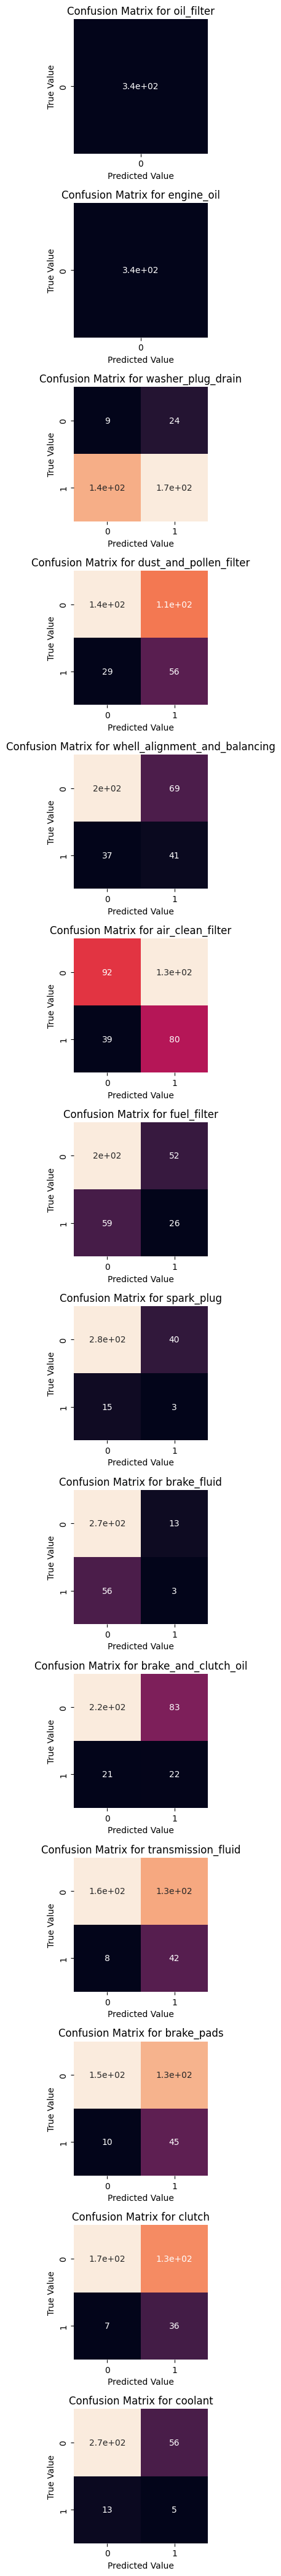

In [11]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=len(target_cols), ncols=1, figsize=(10, len(target_cols)*3))

# Iterate over each target column
for i, target in enumerate(target_cols):
    # Compute the confusion matrix for the current target column
    mat = confusion_matrix(y_test[target], y_pred[:, i])

    # Create a heatmap for the confusion matrix
    sns.heatmap(mat, ax=axes[i], square=True, annot=True, cbar=False)

    #Set title and labels
    axes[i].set_title(f'Confusion Matrix for {target}')
    axes[i].set_xlabel('Predicted Value')
    axes[i].set_ylabel('True Value')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Display the figure
plt.show()

## **Optimization**

### This section involves defining and exploring hyperparameters for our model through grid search, then selecting the best combination for training to optimize model performance.

1. **Setting the Grid Parameters for Grid Search**:
   - Define the hyperparameters to explore.
   - Hyperparameters significantly impact model performance.
   - Grid search systematically tests hyperparameter combinations.

In [12]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
  'classifier__estimator__alpha': [1.0, 0.1, 0.01, 0.001, 0.0001],  # Laplace smoothing parameter
  'classifier__estimator__fit_prior': [True, False]  # Whether to learn class priors from data
}

2. **Executing the Grid Search and Training the Best Model on the Training Data**:
   - Apply grid search to find optimal hyperparameters.
   - Evaluate combinations using cross-validation.
   - Select best hyperparameters based on performance.
   - Retrain model with best hyperparameters on full training data.

In [13]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, verbose=1)

# Train the classifier
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


## **Evaluation of Best Model**

### In this section, we evaluate the performance of the optimized model with tuned parameters using Grid search

In [14]:
# Evaluate the classifier for each component
for i, target in enumerate(target_cols):
    print(f'Evaluating {target}')
    accuracy = accuracy_score(y_test[target], y_pred[:, i])
    print(f'Accuracy: {accuracy}')
    print('Classification Report:')
    print(classification_report(y_test[target], y_pred[:, i]))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test[target], y_pred[:, i]))

Evaluating oil_filter
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       342

    accuracy                           1.00       342
   macro avg       1.00      1.00      1.00       342
weighted avg       1.00      1.00      1.00       342

Confusion Matrix:
[[342]]
Evaluating engine_oil
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       342

    accuracy                           1.00       342
   macro avg       1.00      1.00      1.00       342
weighted avg       1.00      1.00      1.00       342

Confusion Matrix:
[[342]]
Evaluating washer_plug_drain
Accuracy: 0.6286549707602339
Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.30      0.14        33
           1       0.90      0.66      0.76       309

    accuracy                           

c:\Users\Francis Alfonso\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
c:\Users\Francis Alfonso\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


### Confusion matrices

c:\Users\Francis Alfonso\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
c:\Users\Francis Alfonso\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


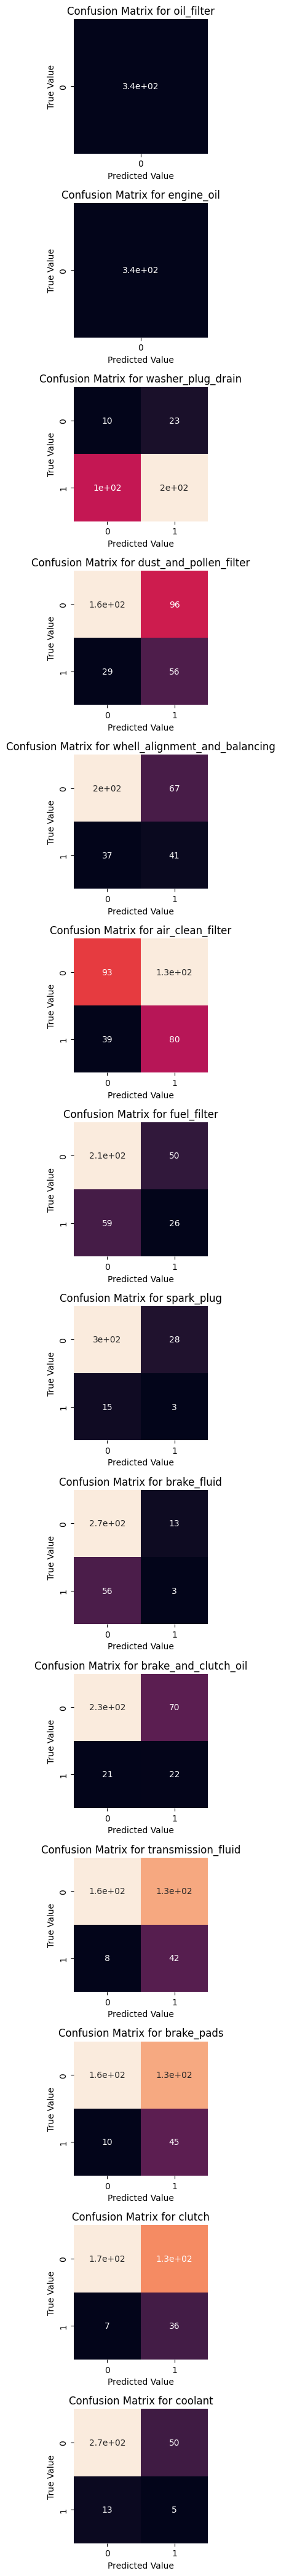

In [15]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=len(target_cols), ncols=1, figsize=(10, len(target_cols)*3))

# Iterate over each target column
for i, target in enumerate(target_cols):
    # Compute the confusion matrix for the current target column
    mat = confusion_matrix(y_test[target], y_pred[:, i])

    # Create a heatmap for the confusion matrix
    sns.heatmap(mat, ax=axes[i], square=True, annot=True, cbar=False)

    #Set title and labels
    axes[i].set_title(f'Confusion Matrix for {target}')
    axes[i].set_xlabel('Predicted Value')
    axes[i].set_ylabel('True Value')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Display the figure
plt.show()

### **Interpretation**

The interpretation and results reveal varying levels of performance across different maintenance tasks:

1. **High Accuracy for Oil-Related Components**: Maintenance tasks related to oil, such as oil filter and engine oil replacement, achieved perfect accuracy. This indicates that the model can reliably identify when these maintenance tasks are needed based on the provided features.

2. **Moderate Performance for Other Components**: Maintenance tasks like wheel alignment, brake fluid, and coolant replacement achieved moderate accuracy levels. While these tasks have decent accuracy, there's still room for improvement, particularly in identifying instances when replacement is necessary.

3. **Challenges with Air and Fuel Filters**: Tasks related to air clean and fuel filter replacement exhibited lower accuracy levels, suggesting the model struggles more with predicting the need for these maintenance tasks. This could be due to various factors, such as feature relevance or the complexity of distinguishing between different conditions.

4. **Considerations for Precision and Recall**: Precision and recall metrics provide additional insights into the model's performance. For some tasks, such as spark plug replacement, the model may have high accuracy but lower recall, indicating it may miss some instances where maintenance is needed. This highlights the importance of considering both precision and recall to assess overall model performance.

Overall, The model performed best on parts that are changed on certain mileage range, which is to be expected since the model heavily relies on mileage to predict. While the model demonstrates promising performance for certain maintenance tasks, there's still room for improvement, particularly in tasks where accuracy levels are moderate or lower. Fine-tuning the model, incorporating additional relevant features, and possibly exploring more advanced modeling techniques could help enhance predictive accuracy and reliability for a broader range of maintenance tasks.

## **Results and Discussion**

### **Compared to other Papers**

Comparing predictive maintenance system results to the other systems:

1. **Accuracy and Predictive Performance**:
   - Our system shows varying accuracy levels across different maintenance tasks, with some achieving perfect accuracy while others exhibit moderate or low accuracy.
   - Prytz et al. (2011) conducted a study titled "Towards Relation Discorvery for Diagnostics" that focuses on unsupervised methods for discovering relationships between measured signals in Volvo trucks, particularly during normal operations and faults. While our system employs supervised learning, both approaches aim to improve maintenance prediction, albeit using different methodologies.

2. **Methodology and Approach**:
   - In Rognvaldsson et al. (2014) introduces the COSMO algorithm for detecting failures in buses, emphasizing a bottom-up approach focused on deviation detection and repair association. In contrast, our system adopts a more top-down approach, directly linking maintenance predictions to specific repairs without detecting deviations.
   - Our system relies heavily on feature engineering and supervised learning techniques, whereas Prytz et al. (2013) discusses off-board data sources like LVD and VSR, evaluating different classifiers for predicting air compressor failures.

3. **Strengths and Limitations**:
   - While our system demonstrates promising accuracy for certain tasks, it lacks the depth of analysis seen in the referenced papers, particularly in terms of unsupervised or off-board data utilization.
   - Rognvaldsson et al. (2014) and Prytz et al. (2013) highlight the importance of data representation and quality, as well as the challenge of detecting deviations and linking them to repairs, which could provide insights for enhancing our system's performance.

4. **Recommendations for Improvement**:
   - To enhance our system, consider incorporating unsupervised learning techniques to discover hidden patterns in maintenance data, similar to Prytz et al. (2011).
   - Explore the integration of off-board data sources and alternative data compression methods, as discussed in  Rognvaldsson et al. (2014) and Prytz et al. (2013), to improve prediction accuracy and robustness.
   - Address the challenges of noisy labels, low update sampling frequency, and feature selection to enhance the precision and recall of our predictive maintenance model, drawing insights from the limitations discussed in the referenced papers.

In summary, while our system achieves notable accuracy for certain maintenance tasks, there are opportunities to enhance its predictive performance and robustness by integrating insights from the methodologies and findings presented in the referenced papers.

### **Summary of Results**

The system shows varying levels of accuracy across different maintenance tasks:

1. **Strengths**:
   - High Accuracy for Oil-Related Components: Achieving perfect accuracy for tasks like oil filter and engine oil replacement indicates robust performance in identifying these maintenance needs.
   - Moderate Performance for Some Tasks: Tasks such as wheel alignment and brake fluid replacement demonstrate decent accuracy, suggesting the model's effectiveness in certain areas.

2. **Challenges and Opportunities for Improvement**:
   - Low Accuracy for Certain Tasks: Maintenance tasks like air clean filter replacement show accuracy around chance level, indicating difficulty in distinguishing between replacement needs.
   - Precision and Recall Considerations: While the model may have high accuracy for some tasks, it's important to consider metrics like precision and recall to assess its overall performance, especially in cases where recall is lower, indicating missed instances of maintenance needs.

3. **Potential Enhancements**:
   - Feature Expansion: Incorporating additional relevant features beyond mileage could improve the model's predictive accuracy, especially for tasks where mileage alone may not be sufficient.
   - Advanced Modeling Techniques: Exploring more advanced machine learning algorithms or ensemble methods could help capture complex relationships in the data and improve the model's performance across all maintenance tasks.

4. **Overall Considerations**:
   - Mileage Dependency: The model's performance is strongest for parts changed on certain mileage ranges, reflecting its reliance on mileage for prediction.
   - Room for Improvement: While the model shows promise, there's significant room for improvement, particularly in achieving higher accuracy and precision for all maintenance tasks.

In summary, while our system demonstrates effectiveness in certain areas, there are opportunities to enhance its performance through feature expansion, algorithmic refinement, and a deeper understanding of the underlying data patterns.

## **References**

  Prytz, Rune & Nowaczyk, Slawomir & Byttner, Stefan. (2011). Towards relation discovery for diagnostics. 23-27. 10.1145/2018673.2018678.

  Prytz, Rune & Nowaczyk, Slawomir & Rognvaldsson, Thorsteinn & Byttner, Stefan. (2013). Analysis of Truck Compressor Failures Based on Logged Vehicle Data.

  Prytz, Rune & Nowaczyk, Slawomir & Rognvaldsson, Thorsteinn & Byttner, Stefan. (2015). Predicting the need for vehicle compressor repairs using maintenance records and logged vehicle data. Engineering Applications of Artificial Intelligence. 41. 10.1016/j.engappai.2015.02.009.

  Prytz, R. (2014). Machine learning methods for vehicle predictive maintenance using off-board and on-board data (Licentiate dissertation, Halmstad University Press). Retrieved from https://urn.kb.se/resolve?urn=urn:nbn:se:hh:diva-27869

  Rognvaldsson, T., Byttner, S., Prytz, R., Nowaczyk, S., & Svensson, M. (2014). Wisdom of crowds for self-organized intelligent monitoring of vehicle fleets. IEEE Trans. Knowl. Data Eng.(TKDE).

  Vehicle maintenance record. (2020, November 5). Kaggle. https://www.kaggle.com/datasets/navins7/vehicle-maintenance-record/data?select=Vehicle+Maintenance-+Service+Records.csv


## **Prediction for Web App**

Below is a sample input and output from the user in thhe Web app where the mileage is 12500 and the vehicle is Honda Amaze Petrol.

In [16]:
input = {'mileage_range': [10000], 'mileage': [12500], 'is_HondaJazzPetrol': [0], 'is_HondaJazzDiesel': [0],
                'is_HondaAmazePetrol': [1], 'is_HondaAmazeDiesel': [0], 'is_HondaCityPetrol': [0], 'is_HondaCityDiesel': [0],
                'is_ToyotaFortunerDiesel': [0]
         }
input_df = pd.DataFrame(data=input)
input_df

,mileage_range,mileage,is_HondaJazzPetrol,is_HondaJazzDiesel,is_HondaAmazePetrol,is_HondaAmazeDiesel,is_HondaCityPetrol,is_HondaCityDiesel,is_ToyotaFortunerDiesel
0,10000,12500,0,0,1,0,0,0,0


In [17]:
prediction = best_model.predict(input_df)
prediction

array([[1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1]], dtype=int64)

This will be the snippet of code of the web app that access the model trained.

In [18]:
import pickle

data = {"model": best_model}
with open('saved_model.pkl', 'wb') as file:
    pickle.dump(data, file)

model_loaded = data["model"]
predict = model_loaded.predict(input_df)
predict

array([[1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1]], dtype=int64)